<a href="https://colab.research.google.com/github/lightfury36/Data-Science/blob/master/Car_Brand_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Transfer Learning Resnet50 using Keras

In [1]:
%tensorflow_version 2.x

In [ ]:
import tensorflow
print(tensorflow.__version__)

2.4.1


Please download the dataset from the below url

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
!unzip -q "/content/gdrive/MyDrive/Datasets.zip"

In [5]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/Datasets/Train'
valid_path = '/content/Datasets/Test'

In [6]:
# Import the resenet50 library as shown below and add preprocessing layer to the front of Resenet 50
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False) ### RGB channel = [3]




94773248/94765736 [==============================] - 0s 0us/step


In [7]:
resnet.summary() #Top and final layers are removed. We can fit last layer based on out output. In this case, we have 3 output classification.

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [8]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [9]:
folders = glob('/content/Datasets/Train/*')

In [10]:
folders

['/content/Datasets/Train/audi',
 '/content/Datasets/Train/lamborghini',
 '/content/Datasets/Train/mercedes']

In [11]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [12]:
len(folders)

3

In [13]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [14]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [15]:
# tell the model what cost and optimization method to use 
# Data augmentation
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
2/2 [==============================] - 16s 10s/step - loss: 5.1847 - accuracy: 0.3229 - val_loss: 8.1018 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 12s 9s/step - loss: 4.8303 - accuracy: 0.4271 - val_loss: 5.7836 - val_accuracy: 0.5172
Epoch 3/50
2/2 [==============================] - 12s 9s/step - loss: 6.3900 - accuracy: 0.2917 - val_loss: 5.8092 - val_accuracy: 0.1552
Epoch 4/50
2/2 [==============================] - 12s 9s/step - loss: 4.9667 - accuracy: 0.3125 - val_loss: 1.9084 - val_accuracy: 0.3448
Epoch 5/50
2/2 [==============================] - 12s 9s/step - loss: 1.7631 - accuracy: 0.5000 - val_loss: 2.6264 - val_accuracy: 0.3276
Epoch 6/50
2/2 [==============================] - 12s 9s/step - loss: 2.6142 - accuracy: 0.4479 - val_loss: 2.2203 - val_accuracy: 0.5517
Epoch 7/50
2/2 [==============================] - 12s 9s/step - loss: 2.0072 - accuracy: 0.4896 - val_loss: 1.7640 - val_accuracy: 0.1897
Epoch 8/50
2/2 [=================

In [ ]:
r.history

{'accuracy': [0.34375,
  0.40625,
  0.296875,
  0.34375,
  0.46875,
  0.4375,
  0.5,
  0.421875,
  0.578125,
  0.515625,
  0.53125,
  0.59375,
  0.640625,
  0.703125,
  0.65625,
  0.6875,
  0.640625,
  0.6875,
  0.734375,
  0.78125,
  0.78125,
  0.859375,
  0.796875,
  0.78125,
  0.84375,
  0.890625,
  0.84375,
  0.78125,
  0.9375,
  0.859375,
  0.890625,
  0.875,
  0.890625,
  0.90625,
  0.875,
  0.9375,
  0.875,
  0.9375,
  0.921875,
  0.9375,
  0.9375,
  0.9375,
  0.921875,
  0.96875,
  0.9375,
  0.96875,
  0.9375,
  0.953125,
  0.890625,
  0.859375],
 'loss': [7.15694522857666,
  4.207795143127441,
  6.329598426818848,
  4.512554168701172,
  2.1181726455688477,
  2.781665086746216,
  1.8241283893585205,
  1.762467384338379,
  1.7722110748291016,
  1.1648997068405151,
  1.7411949634552002,
  1.0368677377700806,
  0.9644061923027039,
  0.7011514902114868,
  0.9536535143852234,
  0.9663885235786438,
  0.7023050785064697,
  0.5789064764976501,
  0.6149278283119202,
  0.5455365777015686

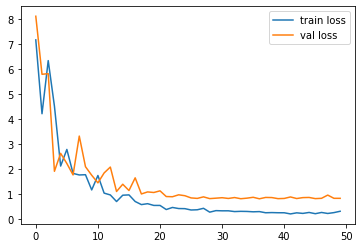

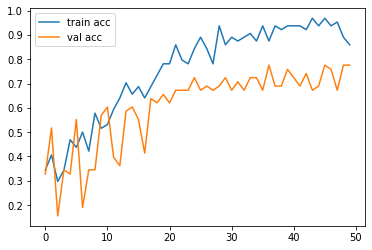

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file. H5 file is a data file saved in the Hierarchical Data Format (HDF). It contains multidimensional arrays of scientific data.


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [ ]:

y_pred = model.predict(test_set)


In [ ]:
y_pred

array([[1.08768595e-02, 9.80919659e-01, 8.20360892e-03],
       [5.41913249e-02, 3.36691111e-01, 6.09117627e-01],
       [9.62300599e-02, 8.86317611e-01, 1.74524076e-02],
       [2.76238024e-01, 3.77501249e-01, 3.46260697e-01],
       [1.34718642e-01, 7.11374264e-03, 8.58167589e-01],
       [9.62326862e-03, 9.42295551e-01, 4.80811708e-02],
       [2.01803073e-03, 9.84106898e-01, 1.38750151e-02],
       [1.59675383e-03, 9.90203619e-01, 8.19965079e-03],
       [1.31268919e-01, 5.41262507e-01, 3.27468604e-01],
       [4.26425226e-02, 8.05468321e-01, 1.51889130e-01],
       [7.55483061e-02, 6.39841616e-01, 2.84610093e-01],
       [4.25402224e-02, 7.53168464e-01, 2.04291344e-01],
       [2.37897999e-04, 1.22074550e-03, 9.98541355e-01],
       [6.51116252e-01, 2.16927096e-01, 1.31956711e-01],
       [1.98593978e-02, 9.79559183e-01, 5.81410481e-04],
       [8.34222078e-01, 1.62690118e-01, 3.08777578e-03],
       [3.72927682e-03, 7.68383384e-01, 2.27887392e-01],
       [1.37434667e-02, 9.69740

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 2, 0, 2, 2, 2, 0, 1, 1, 1, 1, 2, 1, 0, 1, 2, 2, 0, 1, 1, 0,
       1, 2, 1, 1, 1, 1, 2, 2, 1, 0, 1, 2, 1, 1])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_resnet50.h5')

In [ ]:
img=image.load_img('/content/Datasets/Test/lamborghini/12.jpg',target_size=(224,224))



In [ ]:
x=image.img_to_array(img)
x

array([[[ 5., 13., 16.],
        [ 5., 13., 16.],
        [ 5., 13., 16.],
        ...,
        [19., 27., 30.],
        [19., 27., 30.],
        [20., 28., 31.]],

       [[ 5., 13., 16.],
        [ 5., 13., 16.],
        [ 5., 13., 16.],
        ...,
        [16., 24., 27.],
        [16., 24., 27.],
        [17., 25., 28.]],

       [[ 5., 13., 16.],
        [ 5., 13., 16.],
        [ 5., 13., 16.],
        ...,
        [16., 24., 27.],
        [16., 24., 27.],
        [17., 25., 28.]],

       ...,

       [[12., 16., 19.],
        [13., 17., 20.],
        [14., 18., 21.],
        ...,
        [63., 74., 80.],
        [61., 72., 78.],
        [56., 67., 73.]],

       [[12., 16., 19.],
        [13., 17., 20.],
        [14., 18., 21.],
        ...,
        [63., 74., 80.],
        [61., 72., 78.],
        [56., 67., 73.]],

       [[11., 15., 18.],
        [13., 17., 20.],
        [14., 18., 21.],
        ...,
        [66., 77., 83.],
        [64., 75., 81.],
        [59., 70., 76.]]

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[0.01561219, 0.01324511, 0.97114265]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
print(a)

[2]
